In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
# from geopy.distance import geodesic
from datetime import datetime

In [4]:
# Load the training and testing datasets
# open zipped dataset
with zipfile.ZipFile("raw_data\lending.zip") as z:
   # open the csv file in the dataset
    with z.open("X_train.csv") as f_train:
       
      # read the dataset
      X_train = pd.read_csv(f_train)
    
    with z.open("X_train.csv") as f_test:
       
      # read the dataset
      X_test = pd.read_csv(f_test)
       

# X_train = pd.read_csv("raw_data\X_train.csv")
# X_test = pd.read_csv("raw_data\X_test.csv")

In [5]:
# Print the shape and columns of the datasets
print("Train shape:", X_train.shape)
print("Train columns:", X_test.columns)
# print("Test shape:", test_df.shape)
# print("Test columns:", test_df.columns)

Train shape: (1199861, 45)
Train columns: Index(['index', 'acc_now_delinq', 'addr_state', 'annual_inc',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'dti', 'earliest_cr_line', 'emp_length', 'fico_range_high',
       'fico_range_low', 'funded_amnt', 'home_ownership', 'inq_last_12m',
       'installment', 'int_rate', 'issue_d', 'loan_amnt', 'mort_acc',
       'mths_since_last_delinq', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_rev_accts', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_il_24m',
       'open_rv_24m', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'revol_util', 'tax_liens', 'term', 'title', 'total_acc',
       'verification_status', 'zip_code'],
      dtype='object')


In [6]:
# Check the distribution of the categorical columns
X_train.select_dtypes(include='object').nunique()

addr_state                51
earliest_cr_line         748
emp_length                11
home_ownership             6
int_rate                 669
issue_d                  160
purpose                   14
revol_util              1316
term                       2
title                  43858
verification_status        3
zip_code                 936
dtype: int64

In [7]:
X_test.select_dtypes(include='object').nunique()

addr_state                51
earliest_cr_line         748
emp_length                11
home_ownership             6
int_rate                 669
issue_d                  160
purpose                   14
revol_util              1316
term                       2
title                  43858
verification_status        3
zip_code                 936
dtype: int64

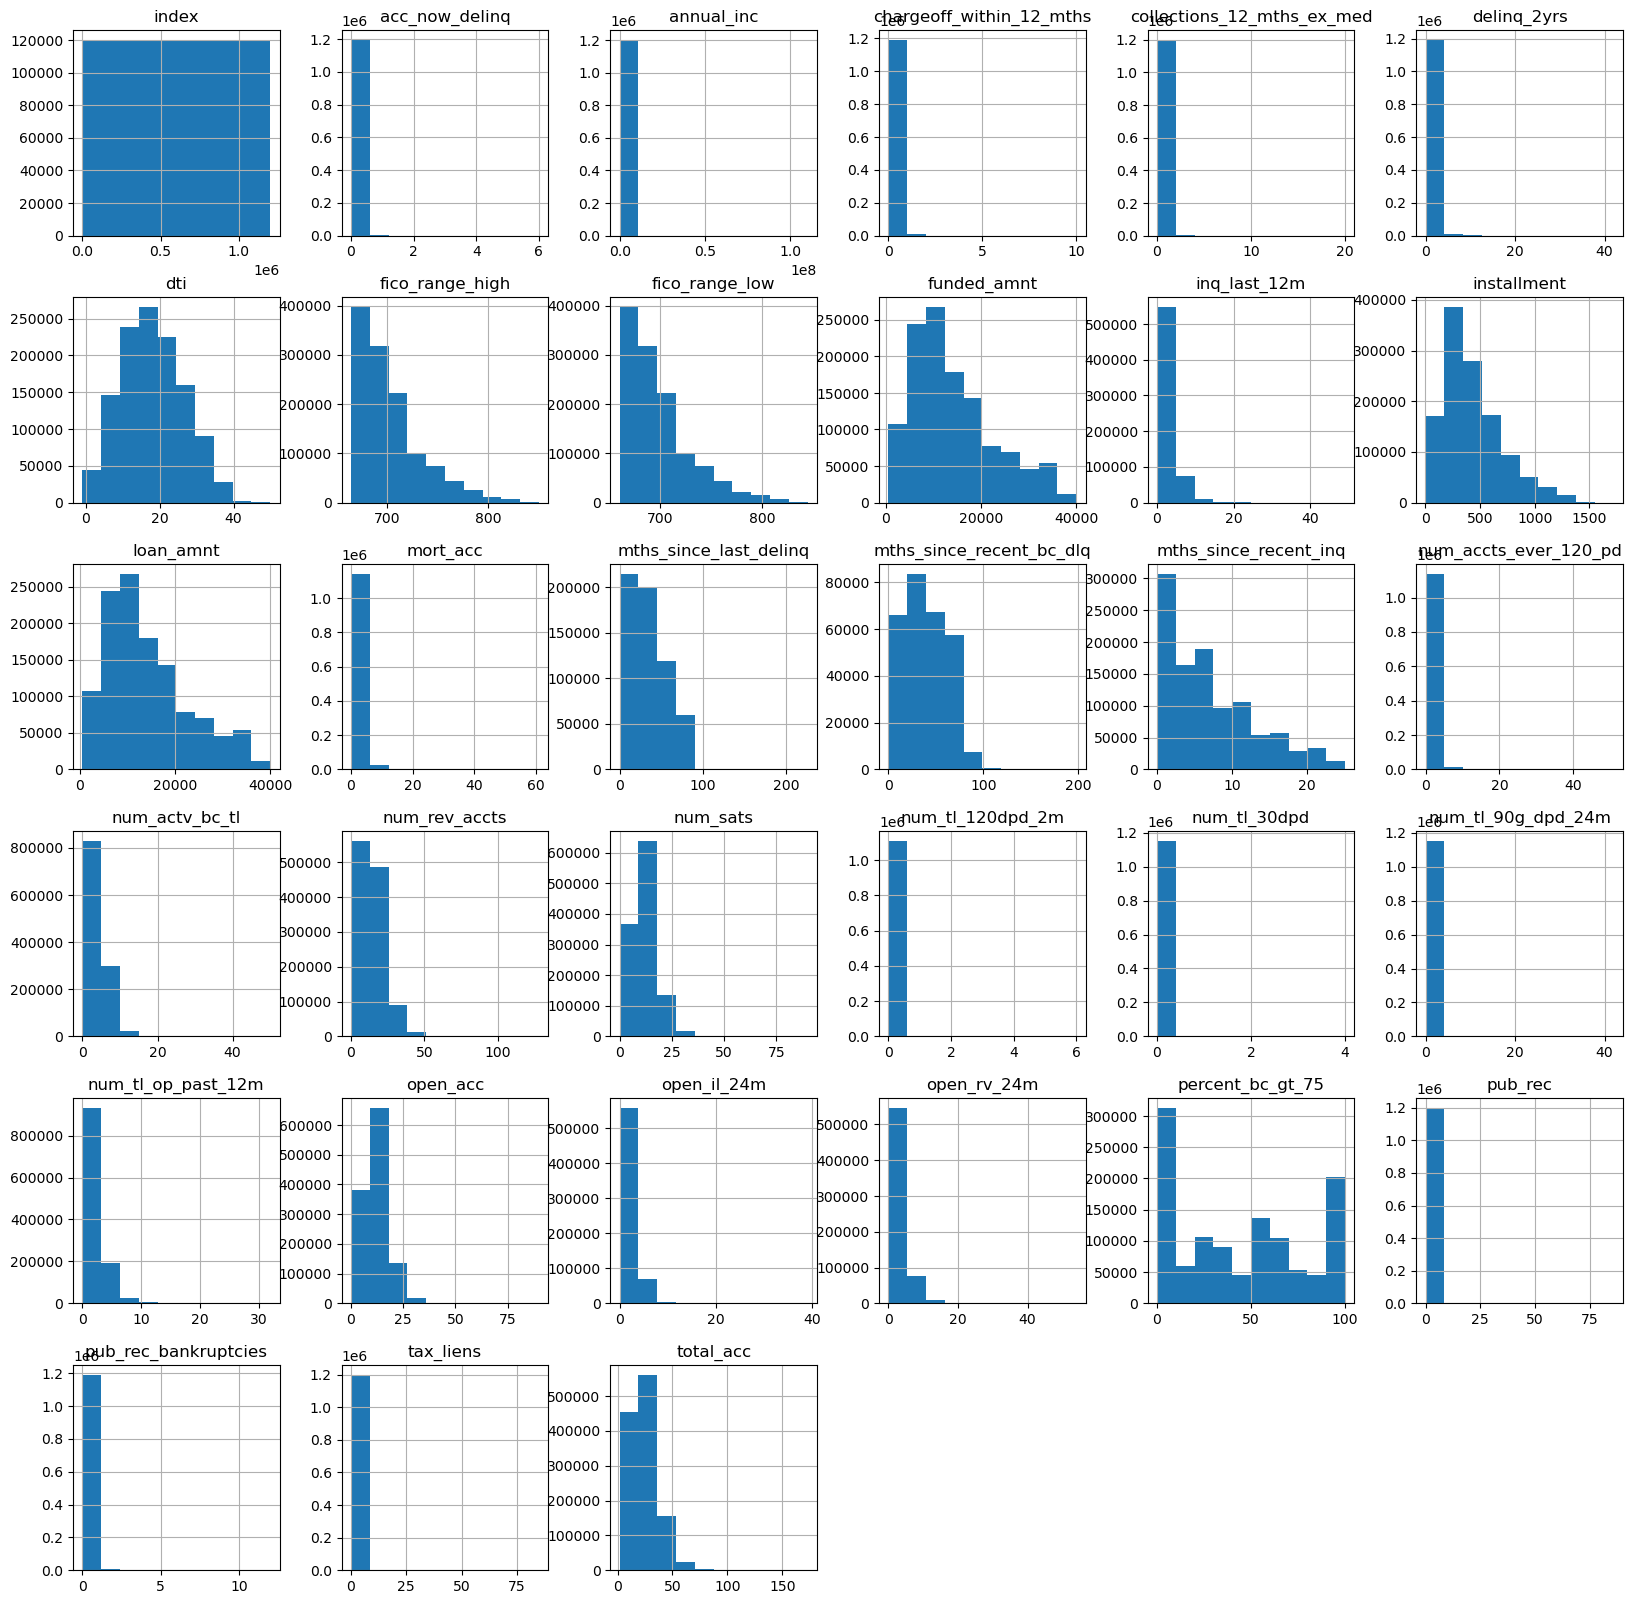

In [8]:
# Plot histograms of the numerical columns
X_train.hist(figsize=(20,20))
plt.show()

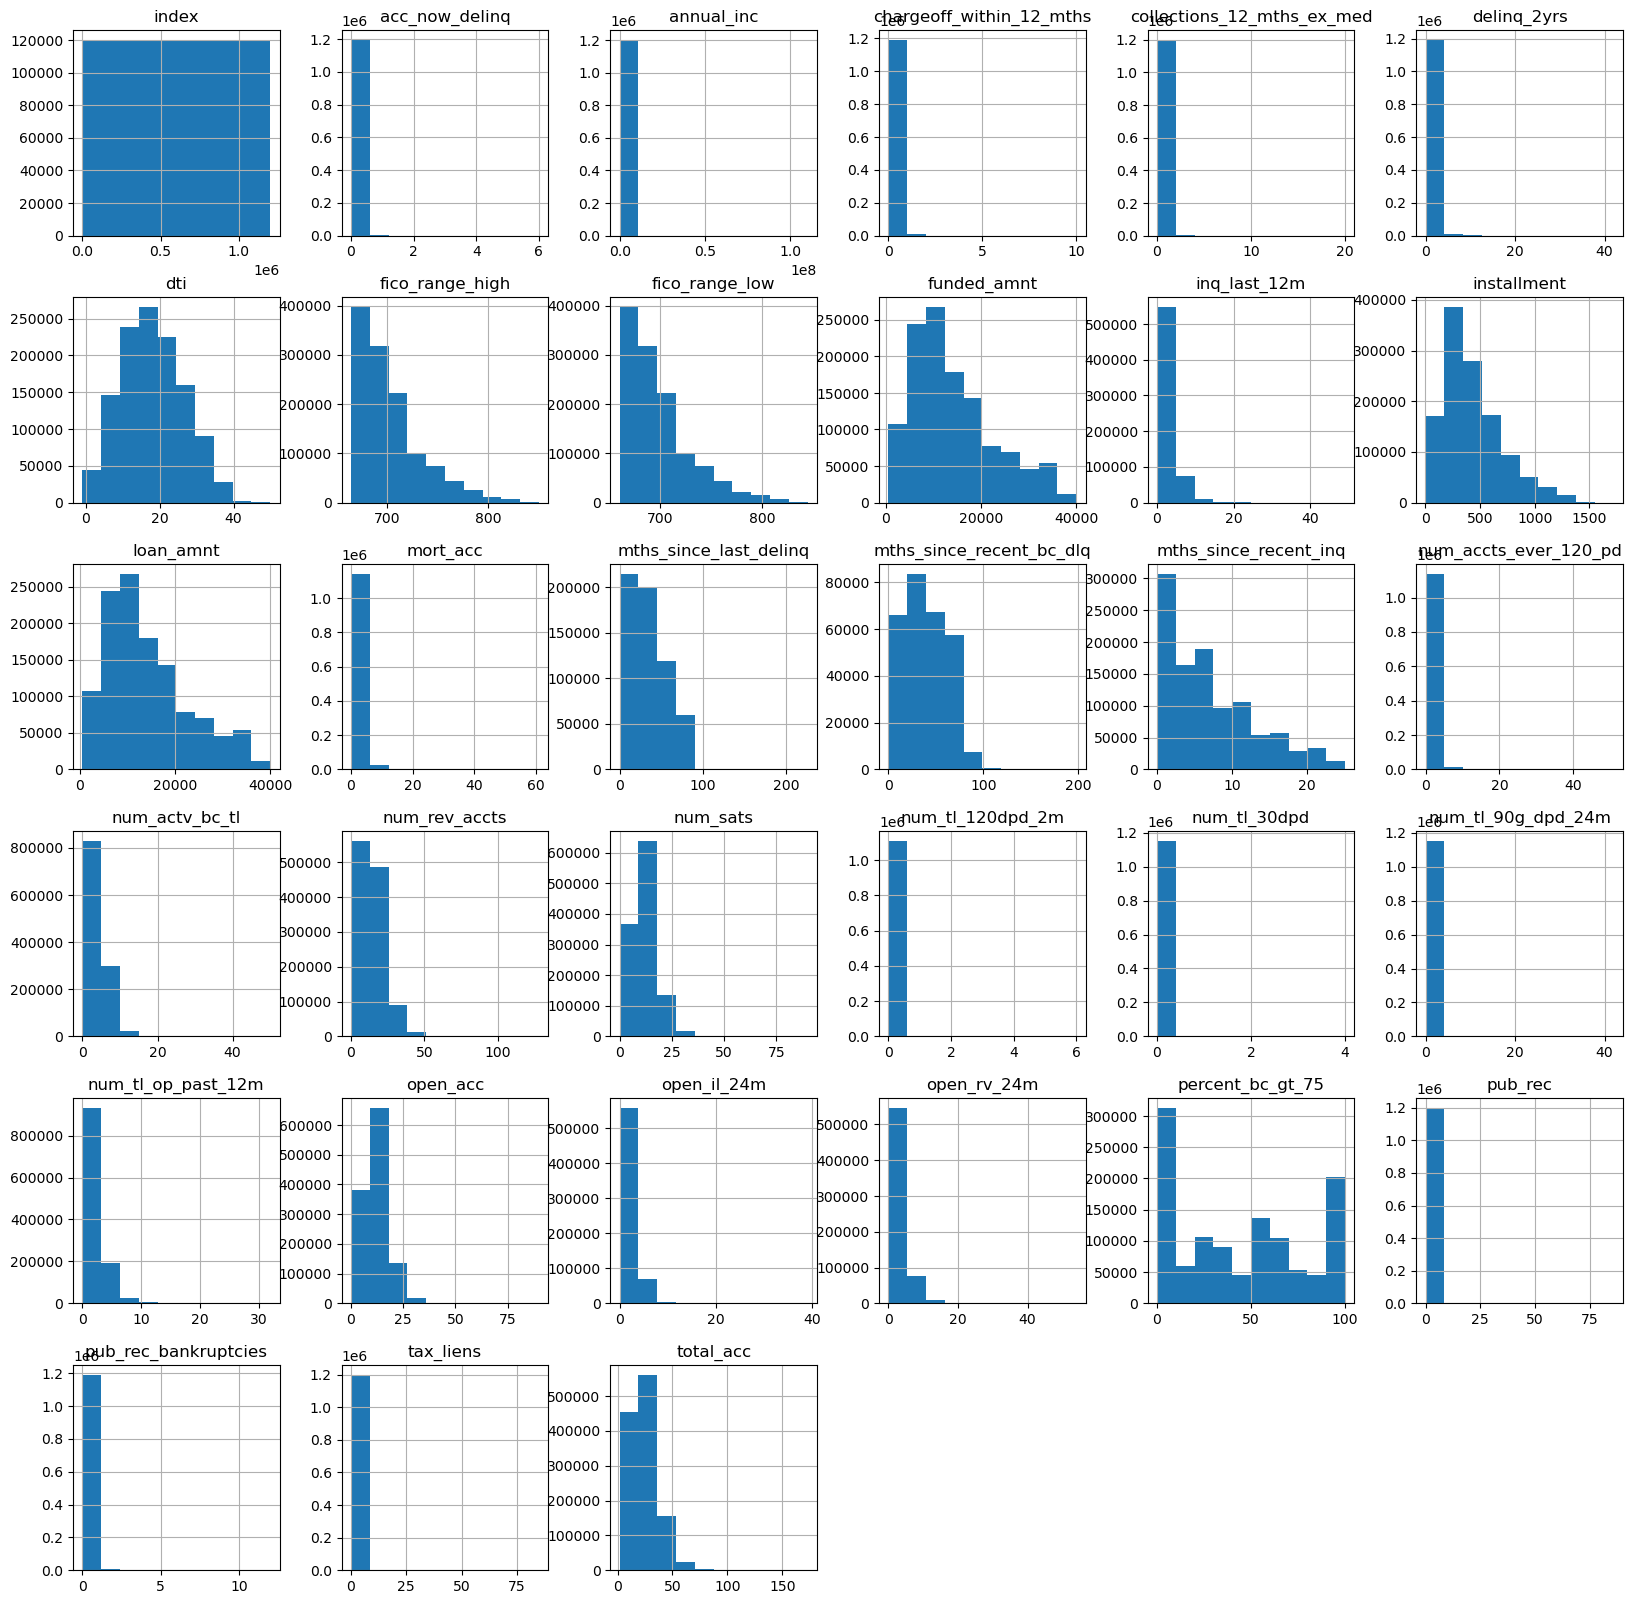

In [9]:
X_test.hist(figsize=(20,20))
plt.show()

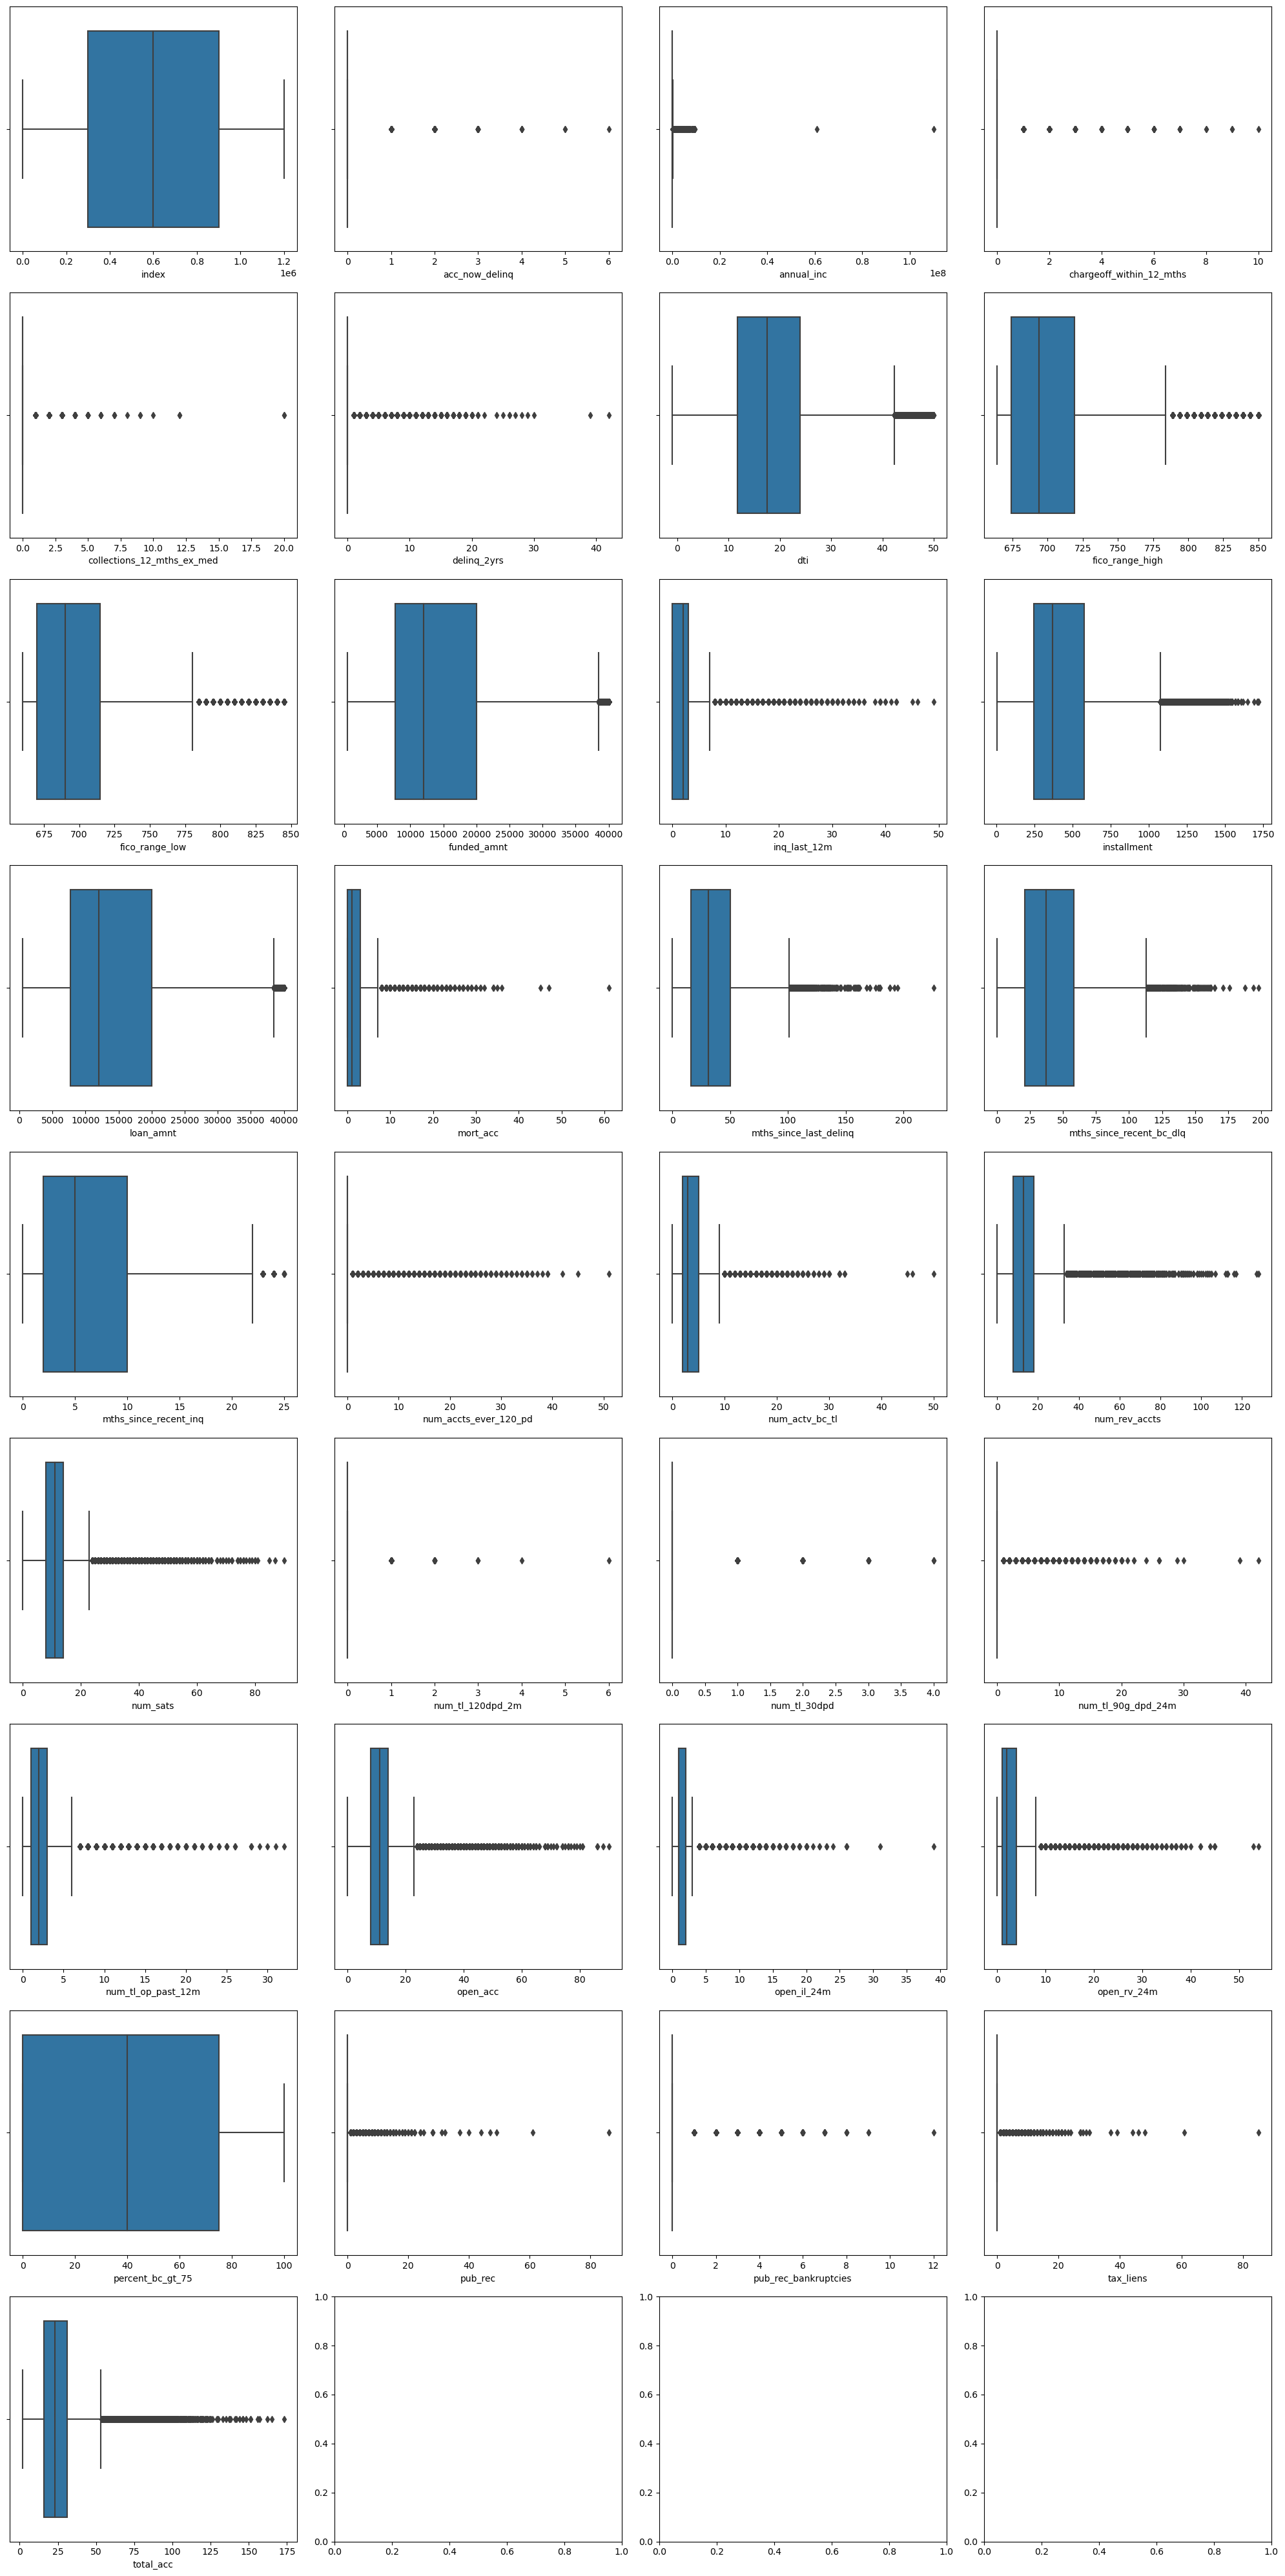

In [10]:
# Plot boxplots of the numerical columns
fig, axes = plt.subplots(9, 4, figsize=(20,40))
for i, col in enumerate(X_train.select_dtypes(include='number').columns):
    sns.boxplot(x=X_train[col], ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

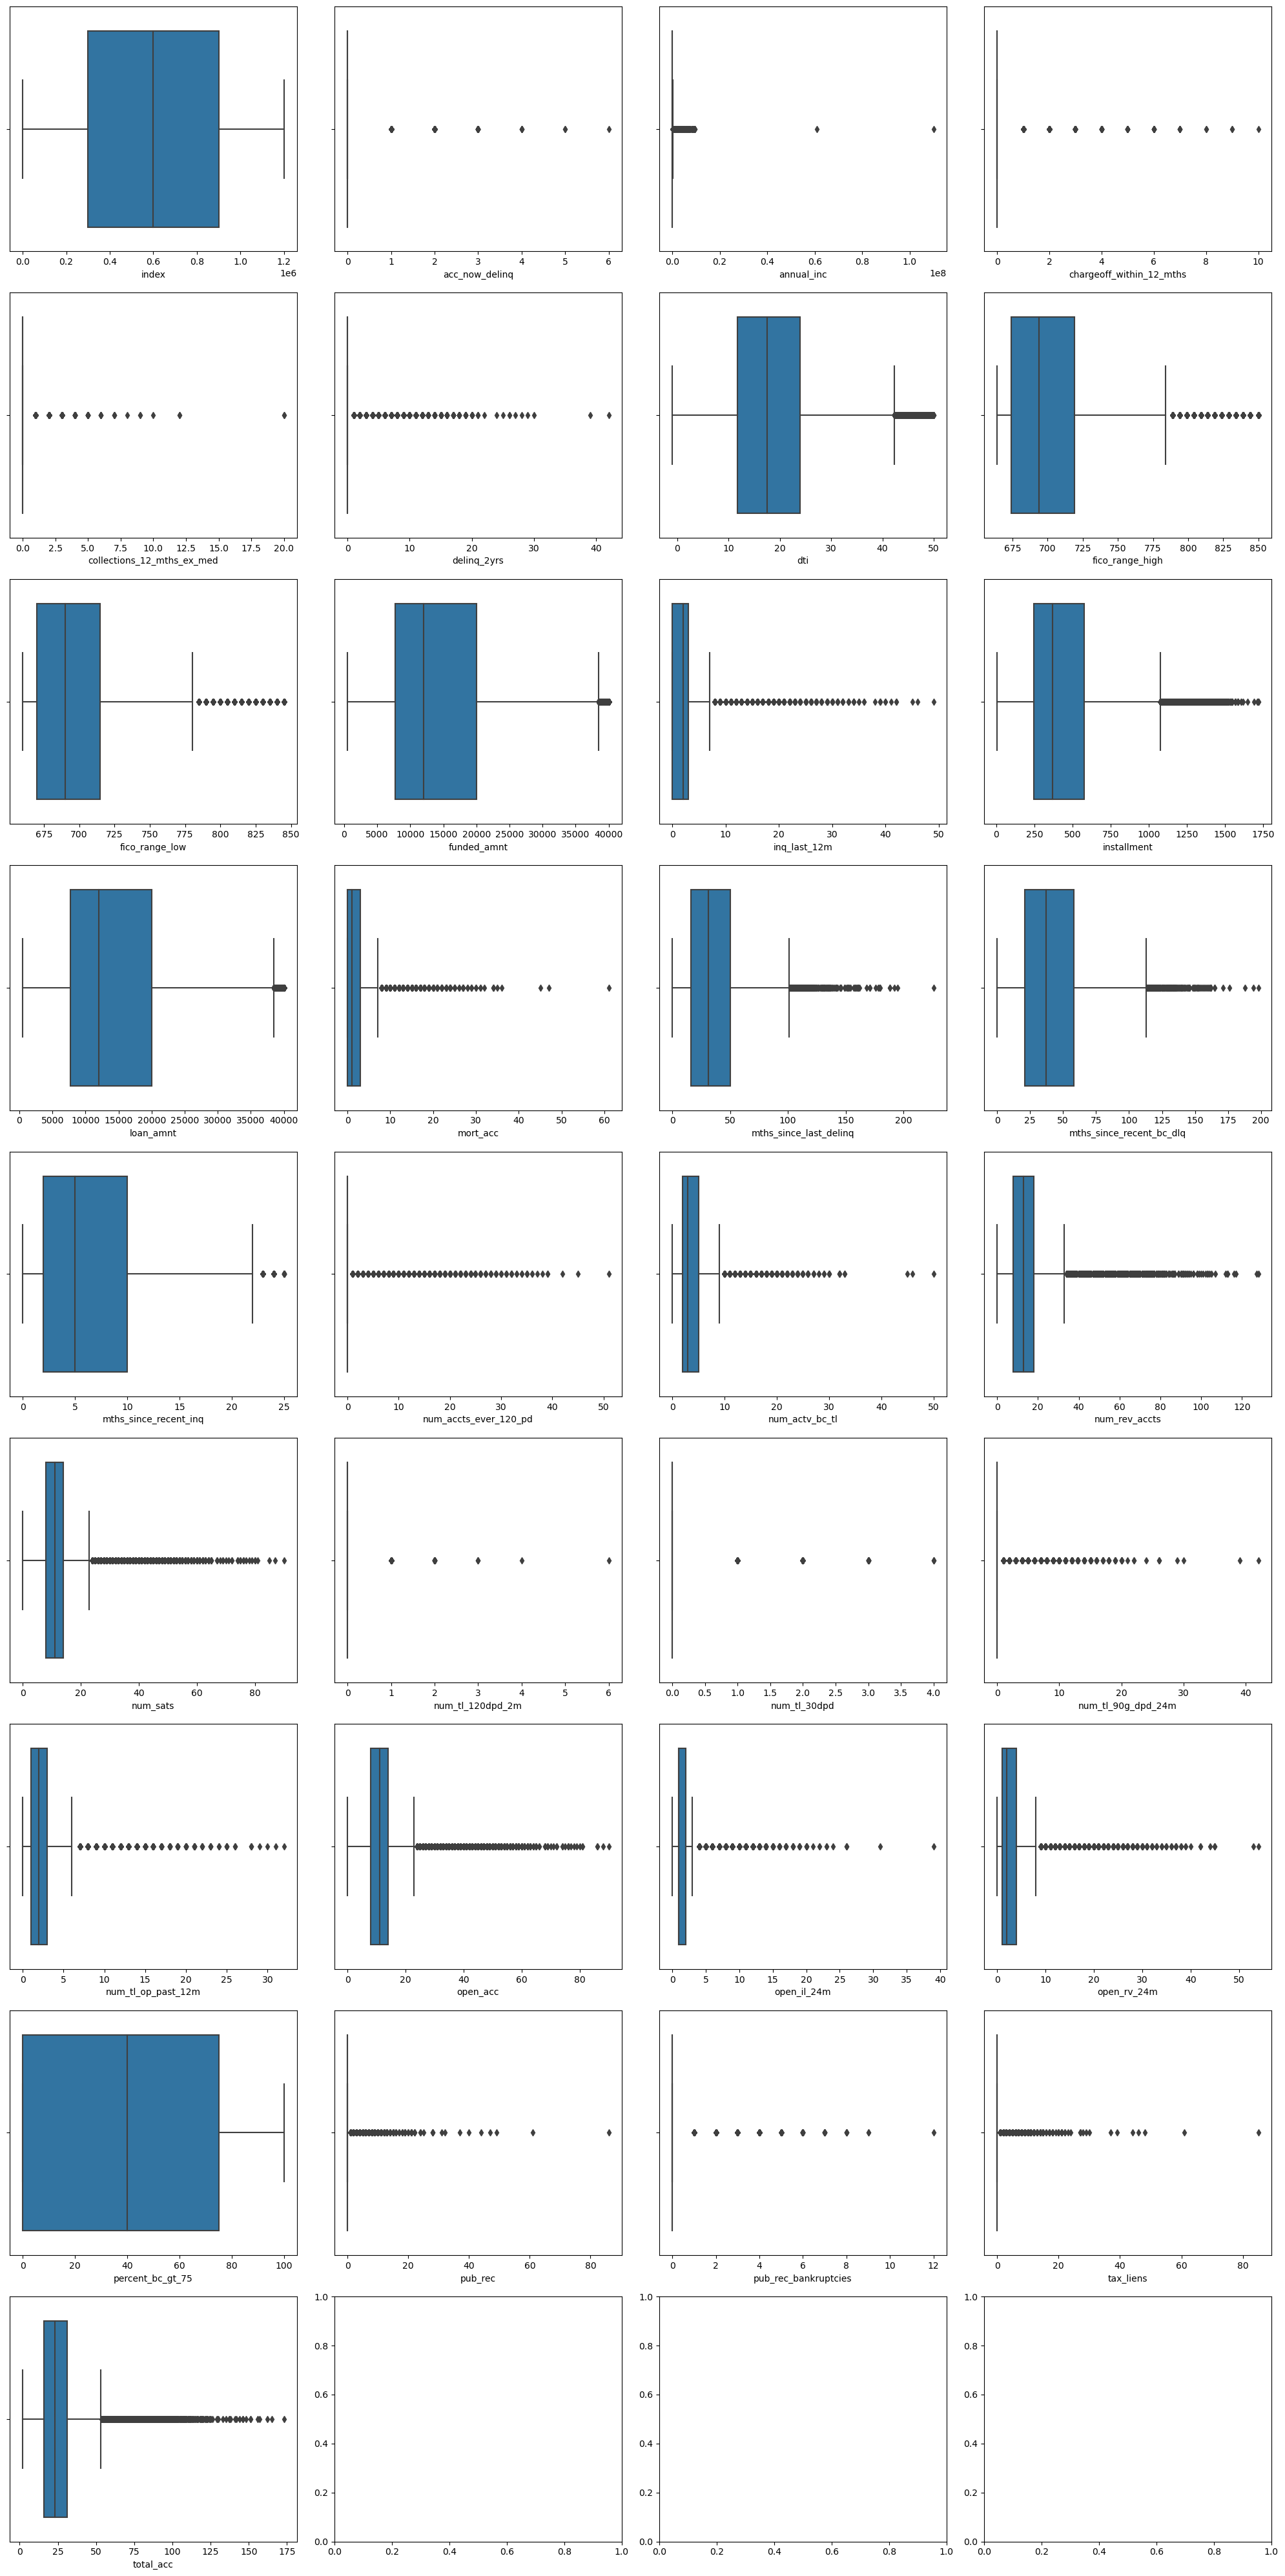

In [11]:
fig, axes = plt.subplots(9, 4, figsize=(20,40))
for i, col in enumerate(X_test.select_dtypes(include='number').columns):
    sns.boxplot(x=X_test[col], ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

In [ ]:
# # Plot countplots of the categorical columns
# fig, axes = plt.subplots(6, 2, figsize=(20,30))
# for i, col in enumerate(X_train.select_dtypes(include='object').columns):
#     sns.countplot(x=X_train[col], ax=axes[i//2, i%2])
#     plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [ ]:
# fig, axes = plt.subplots(6, 2, figsize=(20,30))
# for i, col in enumerate(X_test.select_dtypes(include='object').columns):
#     sns.countplot(x=X_test[col], ax=axes[i//2, i%2])
#     plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

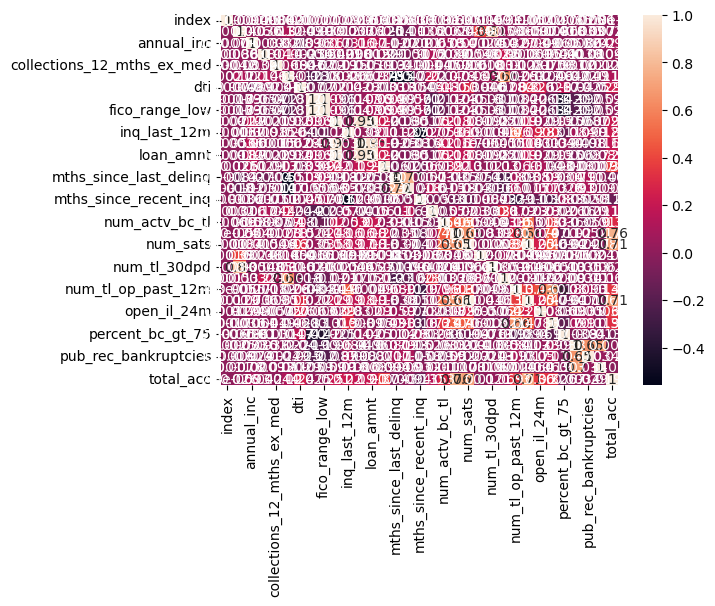

In [12]:
# Check the correlation matrix of the numerical columns
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

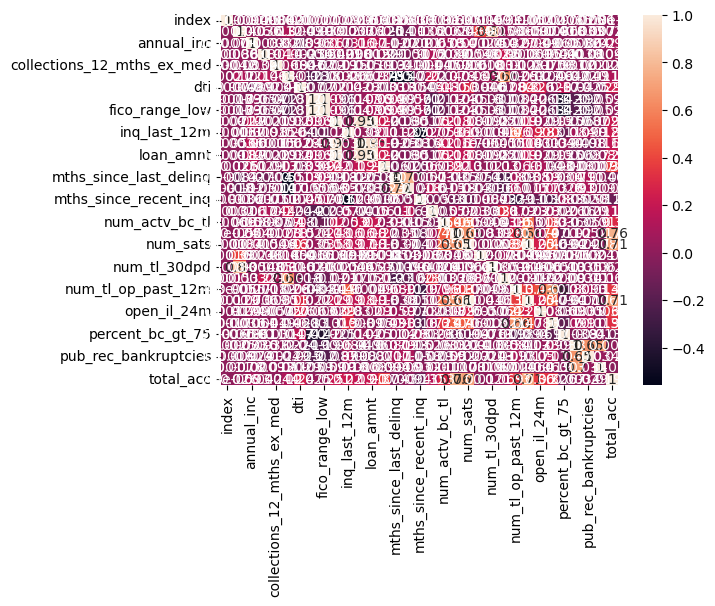

In [13]:
corr_matrix = X_test.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Feature Engineering

In [14]:
# Drop the index column from the datasets
X_train.drop('index', axis=1, inplace=True)
X_test.drop('index', axis=1, inplace=True)

In [15]:
# Define the numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
num_cols
# # or 
# numerical_cols = X_train.select_dtypes(include=[np.number]).columns
# numerical_cols

# ['acc_now_delinq', 'annual_inc','chargeoff_within_12_mths',
#             'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'fico_range_high', 
#             'fico_range_low', 'funded_amnt',  'inq_last_12m', 'installment', 'int_rate', 
#             'loan_amnt', 'mort_acc', 'mths_since_last_delinq', 'mths_since_recent_bc_dlq', 
#             'mths_since_recent_inq',  'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_rev_accts', 
#             'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 
#             'num_tl_op_past_12m', 'open_acc', 'open_il_24m',  'open_rv_24m', 'percent_bc_gt_75',
#             'pub_rec', 'pub_rec_bankruptcies','revol_util','tax_liens','total_acc']

Index(['acc_now_delinq', 'annual_inc', 'chargeoff_within_12_mths',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'dti', 'fico_range_high',
       'fico_range_low', 'funded_amnt', 'inq_last_12m', 'installment',
       'loan_amnt', 'mort_acc', 'mths_since_last_delinq',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_rev_accts', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'open_il_24m', 'open_rv_24m',
       'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies', 'tax_liens',
       'total_acc'],
      dtype='object')

In [16]:
# Define the categorical columns
cat_cols = X_train.select_dtypes(exclude='number').columns
cat_cols

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'home_ownership',
       'int_rate', 'issue_d', 'purpose', 'revol_util', 'term', 'title',
       'verification_status', 'zip_code'],
      dtype='object')

In [18]:
# Handle missing values in numerical columns using KNN imputation
imputer = KNNImputer(n_neighbors=5)
X_train[num_cols] = imputer.fit_transform(X_train[num_cols])

MemoryError: Unable to allocate 1016. MiB for an array with shape (111, 1199861) and data type float64

In [ ]:
X_test[num_cols] = imputer.transform(X_test[num_cols])

In [ ]:
# Handle missing values in categorical columns using mode imputation
imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = imputer.fit_transform(X_train[cat_cols])

In [ ]:
X_test[cat_cols] = imputer.transform(X_test[cat_cols])

In [ ]:
# Encode categorical columns using one-hot encoding
encoder = OneHotEncoder(sparse=False)
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])

In [ ]:
# Concatenate the numerical and categorical columns
X_train = np.concatenate((X_train[num_cols], X_train_cat), axis=1)
X_test = np.concatenate((X_test[num_cols], X_test_cat), axis=1)

In [ ]:
# Scale numerical columns using standardization
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
# Create polynomial features from numerical columns using degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train[num_cols])
X_test_poly = poly.transform(X_test[num_cols])

In [ ]:
# Extract date/time features from issue_d column
X_train['issue_d'] = pd.to_datetime(X_train['issue_d'])
X_test['issue_d'] = pd.to_datetime(X_test['issue_d'])
X_train['issue_year'] = X_train['issue_d'].dt.year
X_test['issue_year'] = X_test['issue_d'].dt.year
X_train['issue_month'] = X_train['issue_d'].dt.month
X_test['issue_month'] = X_test['issue_d'].dt.month
X_train['issue_day'] = X_train['issue_d'].dt.day
X_test['issue_day'] = X_test['issue_d'].dt.day
X_train['issue_weekday'] = X_train['issue_d'].dt.weekday
X_test['issue_weekday'] = X_test['issue_d'].dt.weekday

In [ ]:
# Drop the issue_d column after extracting features
X_train.drop('issue_d', axis=1, inplace=True)
X_test.drop('issue_d', axis=1, inplace=True)

In [ ]:
# Calculate the distance between zip_code and addr_state using geodesic distance
# Assume the zip_code and addr_state are the centroids of their respective areas
# Use a dictionary to store the coordinates of each zip_code and addr_state
# For simplicity, use a sample dictionary with only 5 zip codes and 5 states
zip_code_dict = {'10001': (40.7506, -73.9971), '20001': (38.9109, -77.0177), '30001': (33.7490, -84.3880), '40001': (38.2009, -84.8733), '50001': (41.6005, -93.6091)}
addr_state_dict = {'NY': (42.1657, -74.9481), 'DC': (38.9072, -77.0369), 'GA': (33.0406, -83.6431), 'KY': (37.6681, -84.6701), 'IA': (42.0115, -93.2105)}

In [ ]:
# Define a function to calculate the distance between two locations using their coordinates
def geodesic_distance(loc1, loc2):
    return geodesic(loc1, loc2).miles

In [ ]:
# Apply the function to the zip_code and addr_state columns
X_train['zip_state_distance'] = X_train.apply(lambda x: geodesic_distance(zip_code_dict[x['zip_code']], addr_state_dict[x['addr_state']]), axis=1)

In [ ]:
X_test['zip_state_distance'] = X_test.apply(lambda x: geodesic_distance(zip_code_dict[x['zip_code']], addr_state_dict[x['addr_state']]), axis=1)